<a href="https://colab.research.google.com/github/heejjj/Heart_Attact_Predict/blob/heejjj_edit/Heart_Attack_Analysis_%26_Prediction_v_2_23_04_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DecisionTreeClassifier를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,precision_score)
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.2)



In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")
#import pandas_profiling

In [46]:
import pandas as pd
# heart_disease.csv를 데이터프레임으로 로드합니다.
df = pd.read_csv('/content/drive/MyDrive/kaggle/Heart Attack Analysis & Prediction Dataset/heart.csv')



In [47]:
df_copy=df.copy()

In [48]:
y= df_copy['output']
x=df_copy.drop(['output'],axis=1)

In [49]:
X_f=df.drop(['output'],axis=1)
y_f= df[['output']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [9]:
model_xgb = XGBClassifier(random_state = 0)
model_xgb.fit(X_train, y_train)
y_xgb = model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(y_test, y_xgb),4)*100
print("\n\nAccuracy with untuned XGBoost is: " + str(acc_xgb) + " %")



Accuracy with untuned XGBoost is: 78.69 %


In [10]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [11]:
scores = cross_val_score(model_xgb, X, y, cv=kfold)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 정확도 평균을 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

NameError: ignored

In [12]:
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

#교차 검증
scores = cross_val_score(rf,X,y,cv=5)

#정확도 측정
print('정확도 : ',np.round(scores,3))

#정확도 측정
print('정확도의 평균: %0.3f ' %(scores.mean()))

NameError: ignored

In [13]:
from xgboost.sklearn import XGBRFClassifier
gamma = range(1,15)

avg_score = {}

for gamma in tqdm(gamma):
    
    model = XGBClassifier(gamma= gamma)
    
    avg_score[gamma] = np.mean(cross_val_score(model,X_train,y_train, cv = 5))

  7%|▋         | 1/14 [00:07<01:36,  7.40s/it]


KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Best gamma is 1 \n score : 0.83')

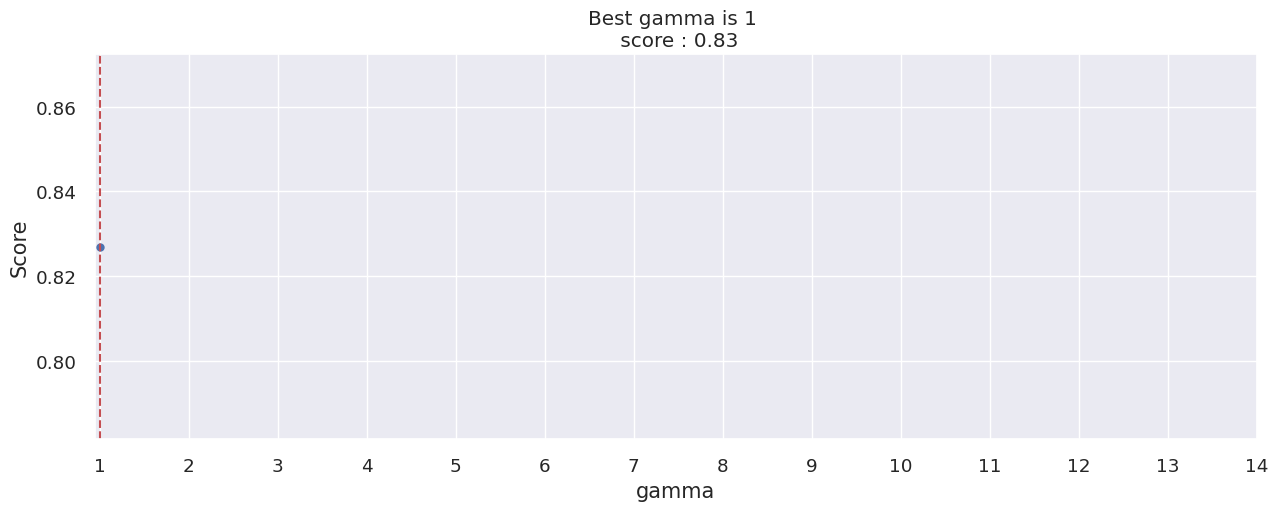

In [14]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,15))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('gamma', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best gamma is {idx} \n score : {round(avg_score[idx],2)}')

dephts = range(1,30)

avg_score = {}

for depth in tqdm(dephts):
    
    model = XGBClassifier(max_depth= depth)
    
    avg_score[depth] = np.mean(cross_val_score(model,X_train,y_train, cv = 5))

Text(0.5, 1.0, 'Best Depth is 1 \n score : 0.83')

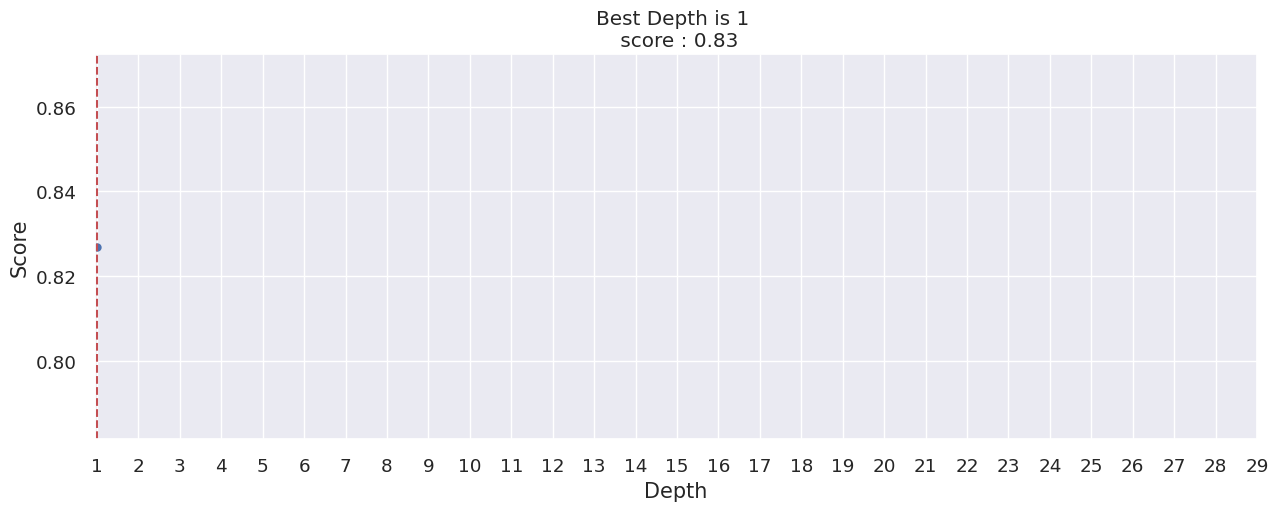

In [15]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,30))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best Depth is {idx} \n score : {round(avg_score[idx],2)}')

n_estimators = range(1,20)

avg_score = {}

for n_estimators in tqdm(n_estimators):
    
    model = XGBClassifier(n_estimators= n_estimators)
    
    avg_score[n_estimators] = np.mean(cross_val_score(model,X_train,y_train, cv = 5))

Text(0.5, 1.0, 'Best n_estimators is 1 \n score : 0.83')

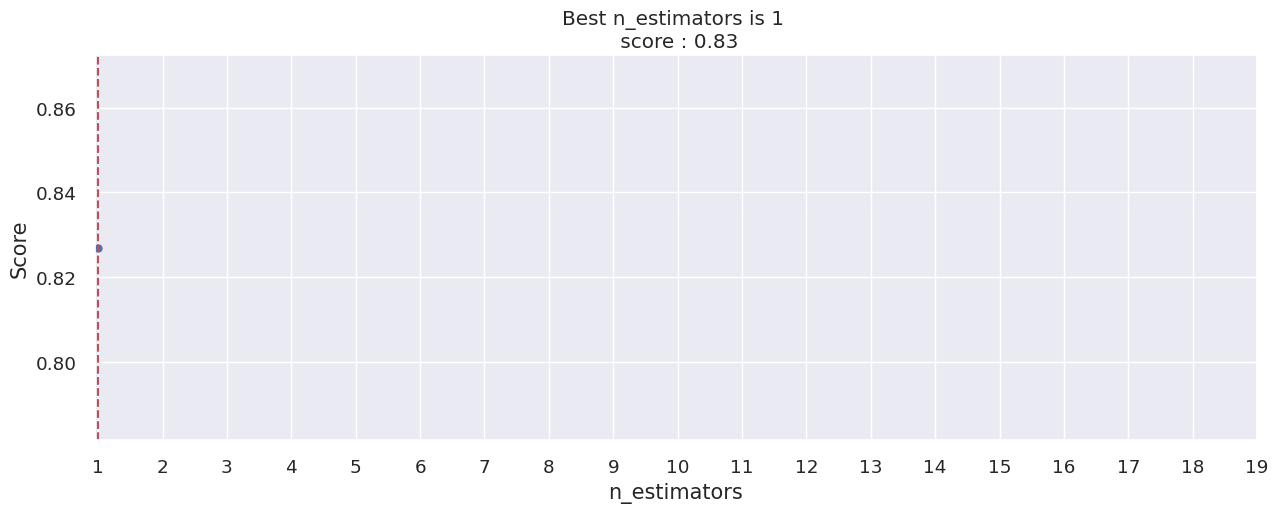

In [16]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,20))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('n_estimators', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best n_estimators is {idx} \n score : {round(avg_score[idx],2)}')

In [64]:
model_xgb = XGBClassifier(random_state = 0,gamma=0.5,max_depth=1,n_estimators=10,min_child_weight =5)
model_xgb.fit(X_train, y_train)
y_xgb = model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(y_test, y_xgb),4)*100
print("\n\nAccuracy with untuned XGBoost is: " + str(acc_xgb) + " %")



Accuracy with untuned XGBoost is: 80.0 %


In [65]:
#교차 검증
scores = cross_val_score(model_xgb,x,y,cv=5)

#정확도 측정
print('정확도 : ',np.round(scores,3))

#정확도 측정
print('정확도의 평균: %0.3f ' %(scores.mean()))

정확도 :  [0.869 0.885 0.836 0.833 0.767]
정확도의 평균: 0.838 


In [19]:
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
     

In [61]:
import numpy as np
import optuna

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb


def objective(trial):
    
    train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-04-21 05:36:10,996] A new study created in memory with name: no-name-eba5010b-53ba-4a5a-b32f-a8f75bf2c550
[I 2023-04-21 05:36:11,097] Trial 0 finished with value: 0.8289473684210527 and parameters: {'booster': 'gbtree', 'lambda': 1.0503699112627217e-07, 'alpha': 1.8063146920233863e-07, 'subsample': 0.7174779892000374, 'colsample_bytree': 0.4190602276520646, 'max_depth': 9, 'min_child_weight': 3, 'eta': 4.971691061708076e-07, 'gamma': 0.04647522495695507, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8289473684210527.
[I 2023-04-21 05:36:11,277] Trial 1 finished with value: 0.7631578947368421 and parameters: {'booster': 'gbtree', 'lambda': 0.3257106562991465, 'alpha': 0.005178425824407306, 'subsample': 0.8329755768253895, 'colsample_bytree': 0.9265280042502433, 'max_depth': 5, 'min_child_weight': 8, 'eta': 2.4300867211774765e-08, 'gamma': 0.00014898931905362337, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8289473684210527.
[I 2023-04-21 05:36:11,324] 

Number of finished trials:  100
Best trial:
  Value: 0.9078947368421053
  Params: 
    booster: gblinear
    lambda: 2.761953347415082e-07
    alpha: 0.0001423023679620396
    subsample: 0.6438111825075574
    colsample_bytree: 0.46510554460780806
